### Wine Project

Data Import:

In [1]:
import pandas as pd

red_path = './data/winequality-red.csv'
white_path = './data/winequality-white.csv'

red_dataset = pd.read_csv(red_path, header=0, sep=';')
white_dataset = pd.read_csv(white_path, header=0, sep=';')

# Task 1 Exploring the data:

In [2]:
display(red_dataset.describe())
display(red_dataset.head())
display(white_dataset.describe())
display(white_dataset.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## White wine quality distribution:

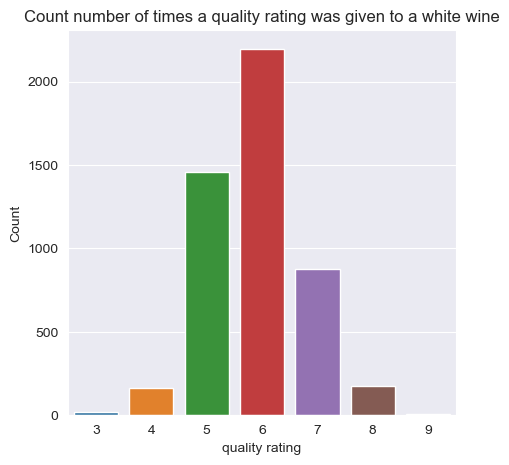

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (5,5))
sns.countplot(x = "quality", data = white_dataset)
plt.title("Count number of times a quality rating was given to a white wine")
plt.xlabel("quality rating")
plt.ylabel("Count")
plt.show()
plt.close()


The above plot shows that between 5 and 7 are the most commonly given quality rating among the white wine samples with 6 being by far the most common. A count plot was used as it clearly displays the distribution of quality ratings given in the white wine database.

## Red wine quality distribution:

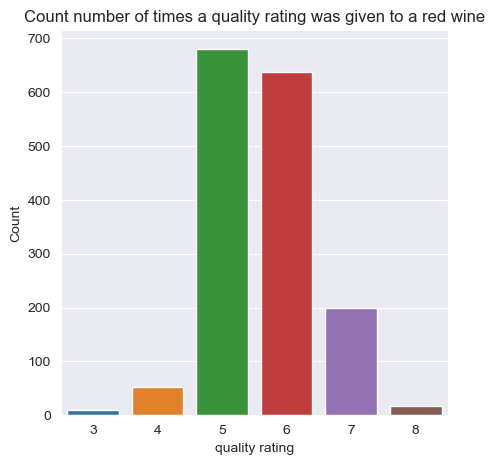

In [4]:
plt.figure(figsize = (5,5))
sns.countplot(x = "quality", data = red_dataset)
plt.title("Count number of times a quality rating was given to a red wine")
plt.xlabel("quality rating")
plt.ylabel("Count")
plt.show()
plt.close()

The above plot shows that 5 and 6 are by far the most commonly given quality ratings for wines in the red wine data set. A count plot was used for the same reason as it was in the white wine example as it gives a clear insight into the distribution of quality ratings given across the samples in the red wine database.

## Comparison of red and white quality distributions:


Text(0.5, 1.0, 'Red Wine')

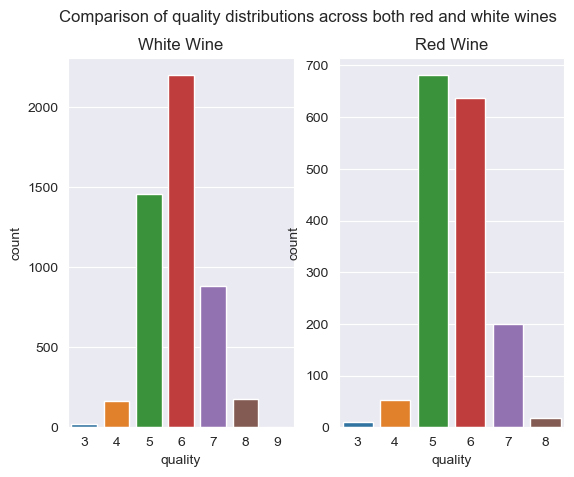

In [5]:
fig, ax =plt.subplots(1,2)
sns.countplot(x="quality",data=white_dataset, ax=ax[0])
sns.countplot(x="quality",data=red_dataset , ax=ax[1])
fig.suptitle("Comparison of quality distributions across both red and white wines")
ax[0].set_title("White Wine")
ax[1].set_title("Red Wine")

The above plots show a comparison between the distribution of quality ratings across the samples of red and white wine. It is clearly shown there are significantly more samples of white wines than red wines. These plots show that both red and white wine share a similar distribution across the quality ratings which were given in each data set this could be because most wines would fall in an average category and only a wine being notably good or notably bad could warrant a rating of less than five or more than 6. It is evident from these graphs that the reviewers are more willing to give a value of 7 than they are to give any value less than 5 this could be due to the reviewers having a generally positive attitude towards wine and so would require more negative motivation to give a bellow average rating, but not enough data on the reviewers is available to test this. The plots also show that on average a higher quality of white wine was sampled compared to red wine this could be due to reviewer preference or due to actually due to lower quality red wines being sampled but again not enough information is available to confirm this.

## Categorizing Wine based on alcohol content white wine:

In [6]:
white_lower = white_dataset["alcohol"].mean() - white_dataset["alcohol"].std()
white_upper = white_dataset["alcohol"].mean() + white_dataset["alcohol"].std()
white_dataset["alcohol_cat"] = pd.cut(
    x=white_dataset["alcohol"],
    bins=[0,white_lower, white_upper, white_dataset["alcohol"].max()],
    labels=["low", "average", "high"]
)
display(white_dataset.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,low
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,average
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,average
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,average
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,average


In the code above a lower and upper bound of alcohol content in white wine is calculated where the upper is one standard deviation above the mean and the lower is one standard deviation bellow the mean. These variables are used to categorise the white wine samples as high medium or low in alcohol content.

## Categorizing wine based on alcohol content Red Wine:

In [7]:
red_lower = red_dataset["alcohol"].mean() - red_dataset["alcohol"].std()
red_upper = red_dataset["alcohol"].mean() + red_dataset["alcohol"].std()
red_dataset["alcohol_cat"] = pd.cut(
    x=red_dataset["alcohol"],
    bins=[0,red_lower, red_upper, red_dataset["alcohol"].max()],
    labels=["low", "average", "high"]
)
display(red_dataset.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average


The same method as with the red wine samples was used to categorise the alcohol content in the red wine samples but the boundaries were adjusted to the red wine data sample.

## Quality Distribution based on alcohol content for white wines:

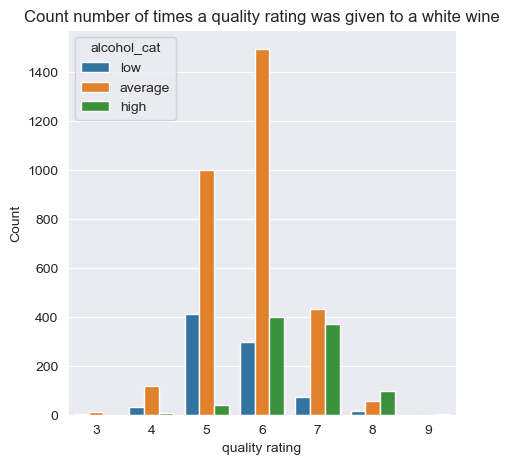

In [8]:
plt.figure(figsize = (5,5))
sns.countplot(x = "quality", data = white_dataset, hue="alcohol_cat")
plt.title("Count number of times a quality rating was given to a white wine")
plt.xlabel("quality rating")
plt.ylabel("Count")
plt.show()
plt.close()

The plot above shows the effect alcohol content has on the distribution of quality ratings given. The plot shows that there are not a huge amount of white wines which are outside the average alcohol content so the alcohol content was quite tightly grouped across the sample and did not vary a huge amount. A count plot was used as it is able to clearly show the effect alcohol content has had on the quality rating distribution with the use of the hue function to separate the categories of alcohol content.

## Quality Distribution based on alcohol content for red wines:

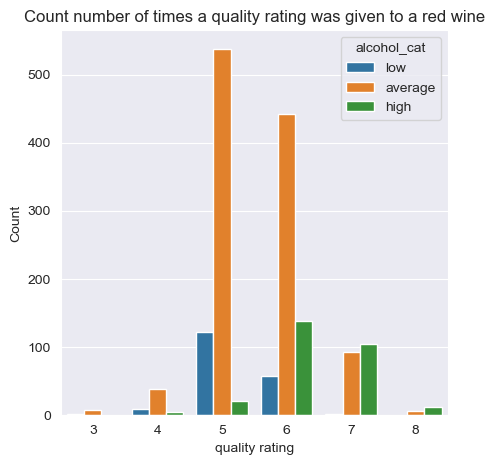

In [9]:
plt.figure(figsize = (5,5))
sns.countplot(x = "quality", data = red_dataset, hue="alcohol_cat")
plt.title("Count number of times a quality rating was given to a red wine")
plt.xlabel("quality rating")
plt.ylabel("Count")
plt.show()
plt.close()

The plot above was used for much the same reasons as the plot fot the white wine which is explained above.

## Quality Distribution comparison between red and white wine based on alcohol content:

Text(0.5, 1.0, 'Red Wine')

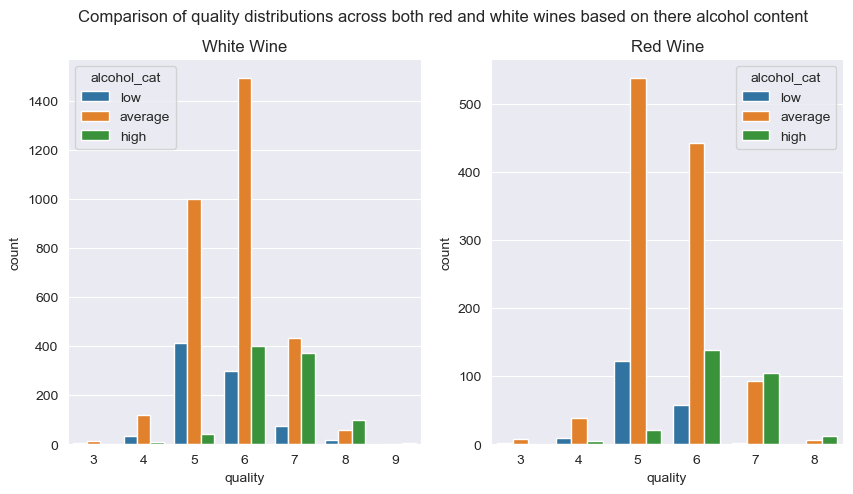

In [10]:
fig, ax =plt.subplots(1,2, figsize=(10,5))
sns.countplot(x="quality",data=white_dataset, ax=ax[0], hue="alcohol_cat")
sns.countplot(x="quality",data=red_dataset , ax=ax[1], hue="alcohol_cat")
fig.suptitle("Comparison of quality distributions across both red and white wines based on there alcohol content")
ax[0].set_title("White Wine")
ax[1].set_title("Red Wine")

The plot above shows the comparison between the effect that alcohol content has on the quality rating given to both red and white wine. Overall both graph exhibit very similar features showing there was not a huge variation in the content of alcohol in the wines sampled. An interesting observation from both graphs is that the lower alcohol content wines for both types of wine were given lower ratings on average shown by the decline of lower alcohol content as the higher rating are given. This could be for a number of reasons and there is not enough data to speculate on these but it does seem that at least a certain level of alcohol content is needed to create a higher quality wine.

## Categorising wine based on residual sugar white wine:

In [11]:
white_dataset["is_sweet"] = pd.cut(
    x=white_dataset["residual sugar"],
    bins=[0, white_dataset["residual sugar"].median(), white_dataset["residual sugar"].max()],
    labels=["dry","sweet"])
display(white_dataset.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,is_sweet
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,low,sweet
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,average,dry
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,average,sweet
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,average,sweet
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,average,sweet


The above code divides the white wine samples into sweet and dry wines based on their residual sugar content this was done by taking the median residual sugar value as the splitting point. This point was chosen to balance the group to make it more useful for machine learning applications later.

## Categorising wine based on residual sugar red wine:

In [12]:
red_dataset["is_sweet"] = pd.cut(
    x=red_dataset["residual sugar"],
    bins=[0, red_dataset["residual sugar"].median(), red_dataset["residual sugar"].max()],
    labels=["dry","sweet"])
display(red_dataset.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,is_sweet
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average,dry
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average,sweet
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average,sweet
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average,dry
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average,dry


The above code divides the red wine samples into sweet and dry wines based on their residual sugar content it was done using the same method as with the white wine samples for the same reasons. This data set did not split with the same balance as the white wine set and is slightly skewed toward dry wines this will be taken into account for future machine learning applications.

Text(0.5, 1.0, 'Red Wine')

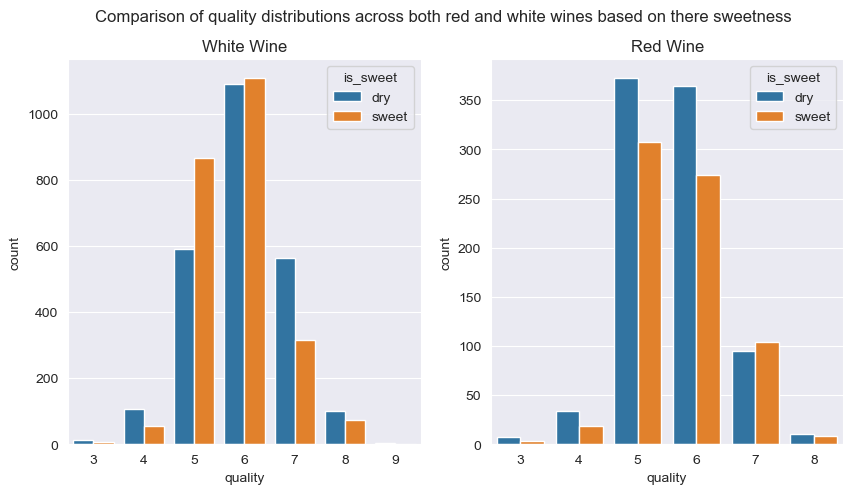

In [13]:
fig, ax =plt.subplots(1,2, figsize=(10,5))
sns.countplot(x="quality",data=white_dataset, ax=ax[0], hue="is_sweet")
sns.countplot(x="quality",data=red_dataset , ax=ax[1], hue="is_sweet")
fig.suptitle("Comparison of quality distributions across both red and white wines based on there sweetness")
ax[0].set_title("White Wine")
ax[1].set_title("Red Wine")

The above plot shows the effect sweetens has on quality ratings given to the wines sampled. Count graphs were used with a hue based on the sweet or dry categorization made above to clearly show the effect of sweetness on wine quality ratings. The sweetness based on the categorization factors chosen does not seem to have much of an effect on the quality rating given to the wines sampled. There is perhaps a slight skewing towards higher quality white wines being dry but this does not have a strong enough link to say anything conclusive.

# Task 2: Determining which subset of variables is the most useful for learning

## Determining the correlation of the data in the white wine data set

<AxesSubplot:>

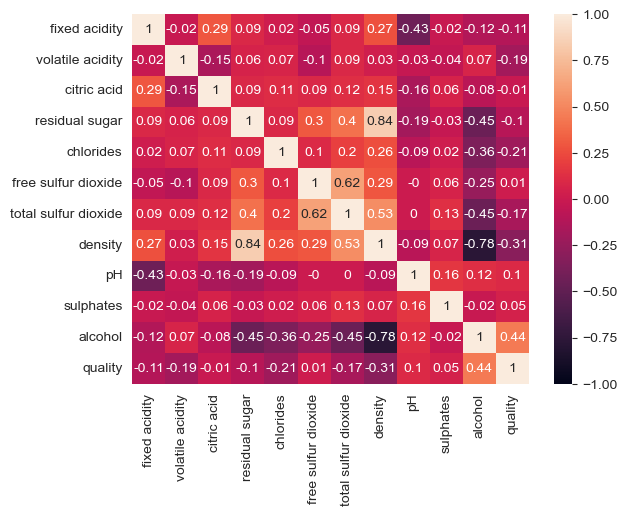

In [16]:
sns.heatmap(white_dataset.corr(method="pearson").round(2), annot=True,vmin=-1, vmax=1)

The above plot shows a visual representation of the correlation matrix for the white wine data set. The Pearson's correlation coefficient was used as the data was normal most of the time, and it is all quantitative meaning that Pearson's appeared to be the best fit. A heat map was used to give a clear and easy to understand visualisation of the correlation matrix which was produced across the white wine data sample. The plot show that some values do have a reasonable correlation and some have almost no correlation some interesting examples of these are alcohol content appears to have quite a strong negative correlation with the density of the wine meaning as the alcohol content of the wine increases its density decreases this could be due to the fact that alcohol has a relatively low density and thus as it makes up a larger percentage of the wines it causes the density to decrease. There is then a strong positive correlation between the residual sugar and the density of the wine meaning as the residual sugar content increases the wines density increases this could be due to residual sugar having a high density in and of its self causing the density of the wine to increase in the wines which contain more of it. The free sulphur and total sulfur dioxides of the wine samples share a medium positive correlation which is not surprising as an increased number of free sulphur dioxide would suggest there should be more total sulfur dioxide on average. The total sulphur dioxide also has a medium positive correlation with the density again suggesting that sulphur dioxide could be one of higher density ingredients in the wine. When it comes to the wines quality rating the highest correlation seems to be with alcohol content which has a medium positive correlation showing that it may be possible that higher quality wines contain more alcohol. All of these are assumptions based on the data which has been collected and a more indepth quality scaling system may have helped to provide more context to this also more information on the reviewers may have allowed for more conclusive data analysis.

## Determining the correlation of the data in the red wine data set

<AxesSubplot:>

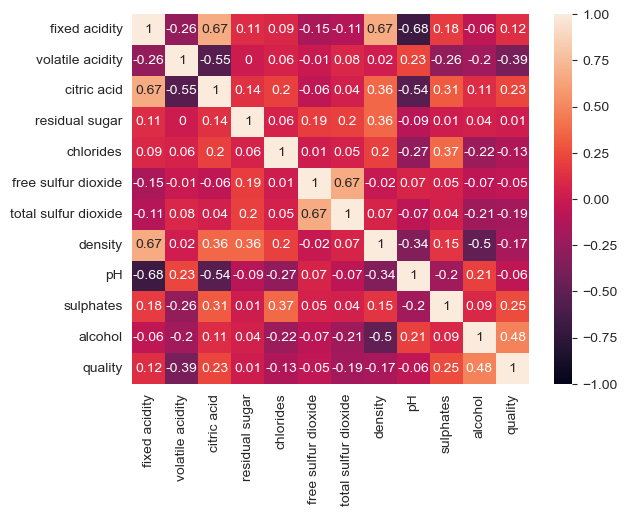

In [18]:
sns.heatmap(red_dataset.corr(method="pearson").round(2), annot=True,vmin=-1, vmax=1)

The above plot shows a visual representation of correlation matrix created from the red wine data set using Pearson's correlation coefficient and a heat map to provide a visualisation of the data these options were chosen for the same reasons as explained in the white wine plot above. Some of the more interesting findings from this plot are fixed acidity and citric acid have a reasonably strong positive correlation while the volatile acidity as a medium strength negative correlation this could suggest that the fixed acidity comes from the citric acid contained in red wine and the volatile acidity is supplied by a different ingredient. The free sulfur and total sulphur dioxide values share a reasonable strong correlation as in the white wine which again could be for reasons specified in the white wine plot above. The density of the red wine samples has a reasonably strong positive correlation with the fixed acidity which could suggest the ingredients which give the wine it fixed acidity are also some of the more dense ingredients. The pH has a reasonably strong negative correlation with the fixed acidity and the citric acid content which makes sense as an increased amount of these ingredients would cause the wine to be more acidic brining the pH down. The quality rating of the wine does share a medium strength positive correlation with the alcohol content of the wine which could suggest that a higher alcohol content up to a point produces a higher quality red wine. The volatile acidity of the wine has a medium strength negative correlation with the quality rating the wine was given this could suggest that volatile acidity is not a desirable trait in red wine.

## Comparison of the red and white wine correlation matrices:

Text(0.5, 1.0, 'Red Wine')

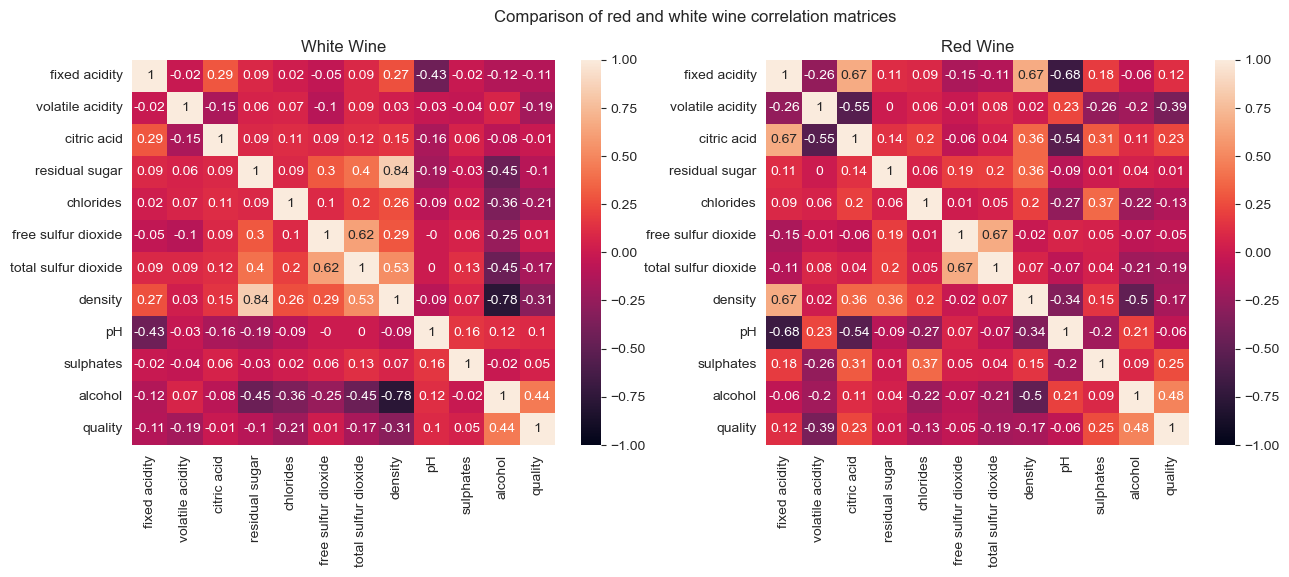

In [20]:
fig, ax =plt.subplots(1,2, figsize=(15,5))
sns.heatmap(white_dataset.corr(method="pearson").round(2), annot=True,vmin=-1, vmax=1, ax=ax[0])
sns.heatmap(red_dataset.corr(method="pearson").round(2), annot=True,vmin=-1, vmax=1, ax=ax[1])
fig.suptitle("Comparison of red and white wine correlation matrices")
ax[0].set_title("White Wine")
ax[1].set_title("Red Wine")

The above plot shows side by side the correlation matrices for the red and white wine data sets. These show that most of the correlations between the samples are shared but to varying degrees one example of this is that total sulphur dioxide content seems to have a much stronger correlation to the density of the wine in white wine than it does in red wine and the same goes for residual sugar content this could be due to a number of reasons.The reasons for this could be red wines on average having lower quantities of these ingredients causing them to have less of an impact on the overall density or other ingredients just having much larger impacts on the density further studies on the wines would be needed to make any real claims.An interesting observation is that in both plots alcohol content has a medium strength positive correlation to the quality rating given the wine which pose some interesting questions on whether a higher alcohol content causes a wine to be a higher quality or if higher quality wines simply contain more alcohol.
From these plots it is still difficult to determine which parameters would be useful for a successful machine learning model but going forward I will exclude any values which had a correlation value of less than 0.1 and more than -0.1 with the quality rating given the wine.
For white wine sulphates, free sulphur dioxide and citric acid will be excluded.
For red wine pH, free sulphur dioxide and residual sugar will be excluded.

# Task 3: machine learning approaches: